<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [22]:
# Создаём соединение с заданными параметрами:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# Создаем запрос
query_3_1 = f'''
            SELECT COUNT(*) AS "Количество вакансий"
            FROM public.vacancies
'''

In [5]:
# результат запроса
df_3_1 = pd.read_sql_query(query_3_1,connection)
display(df_3_1)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/3285231833.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_1 = pd.read_sql_query(query_3_1,connection)


,Количество вакансий
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# Создаем запрос
query_3_2 = f'''
            SELECT COUNT(*) AS "Количество работодателей"
            FROM public.employers
'''

In [7]:
# результат запроса
df_3_2 = pd.read_sql_query(query_3_2,connection)
display(df_3_2)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/3546784805.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_2 = pd.read_sql_query(query_3_2,connection)


,Количество работодателей
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
            SELECT COUNT(*) AS "Количество регионов"
            FROM public.areas
'''

In [9]:
# результат запроса
df_3_3 = pd.read_sql_query(query_3_3,connection)
display(df_3_3)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/778441598.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_3 = pd.read_sql_query(query_3_3,connection)


,Количество регионов
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
            SELECT COUNT(*) AS "Количество сфер деятельности"
            FROM public.industries
'''

In [11]:
# результат запроса
df_3_4 = pd.read_sql_query(query_3_4,connection)
display(df_3_4)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/4052826188.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_3_4 = pd.read_sql_query(query_3_4,connection)


,Количество сфер деятельности
0,294


***

In [ ]:
# выводы по предварительному анализу данных

### Выводы по предварительному анализу данных:

* Всего в исследуемой базе данных 49 197 вакансий, представленных в 294 сферах деятельности, от 23 501 работодателя в 1 362 регионах.
* География регионов - Россия и СНГ.
* Количество вакансий более чем в 2 раза болше количества работодателей. Некоторые работодатели разместили больше одной вакансии, то есть у них идет интенсивный набор в штат.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [76]:
# текст запроса
query_4_1 = f'''
            SELECT 
                a.name AS area,
                COUNT(v.id) AS cnt
            FROM public.vacancies AS v
                LEFT JOIN public.areas AS a ON v.area_id=a.id
            GROUP BY a.name
            ORDER BY cnt DESC
            LIMIT 5
'''

In [77]:
# результат запроса
df_4_1=pd.read_sql_query(query_4_1,connection)
display(df_4_1)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/3081585886.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_1=pd.read_sql_query(query_4_1,connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


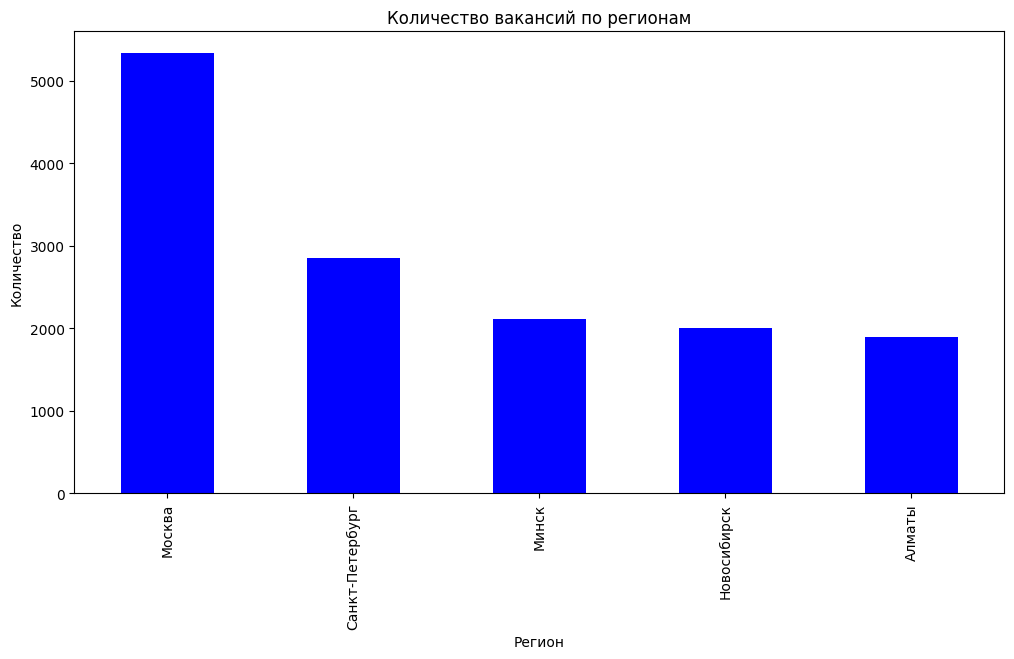

In [67]:
df_4_1.plot(
    x='area',
    figsize=(12,6),
    kind='bar',
    title='Количество вакансий по регионам',
    color='blue',
    xlabel='Регион',
    ylabel='Количество',
    legend=False
    );

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [78]:
# текст запроса
query_4_2 = f'''
            SELECT 
                COUNT(id) 
            FROM public.vacancies
            WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL 
'''

In [79]:
# результат запроса
df_4_2=pd.read_sql_query(query_4_2,connection)
display(df_4_2)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/2626502413.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_2=pd.read_sql_query(query_4_2,connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [84]:
# текст запроса
query_4_3 = f'''
            SELECT 
                ROUND(AVG(salary_from)) AS "Среднее по нижней границе ЗП",
                ROUND(AVG(salary_to)) AS "Среднее по верхней границе ЗП"
            FROM public.vacancies
'''

In [85]:
# результат запроса
df_4_3=pd.read_sql_query(query_4_3,connection)
display(df_4_3)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/2036627555.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_3=pd.read_sql_query(query_4_3,connection)


,Среднее по нижней границе ЗП,Среднее по верхней границе ЗП
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [94]:
# текст запроса
query_4_4 = f'''
            SELECT 
                schedule AS "График работы",
                employment AS "Тип трудоустройства",
                COUNT(*) AS "Количество вакансий"                
            FROM public.vacancies
            GROUP BY 1,2
            ORDER BY 3 DESC
'''

In [98]:
# результат запроса
df_4_4=pd.read_sql_query(query_4_4,connection)
display(df_4_4)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/793491224.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_4=pd.read_sql_query(query_4_4,connection)


,График работы,Тип трудоустройства,Количество вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


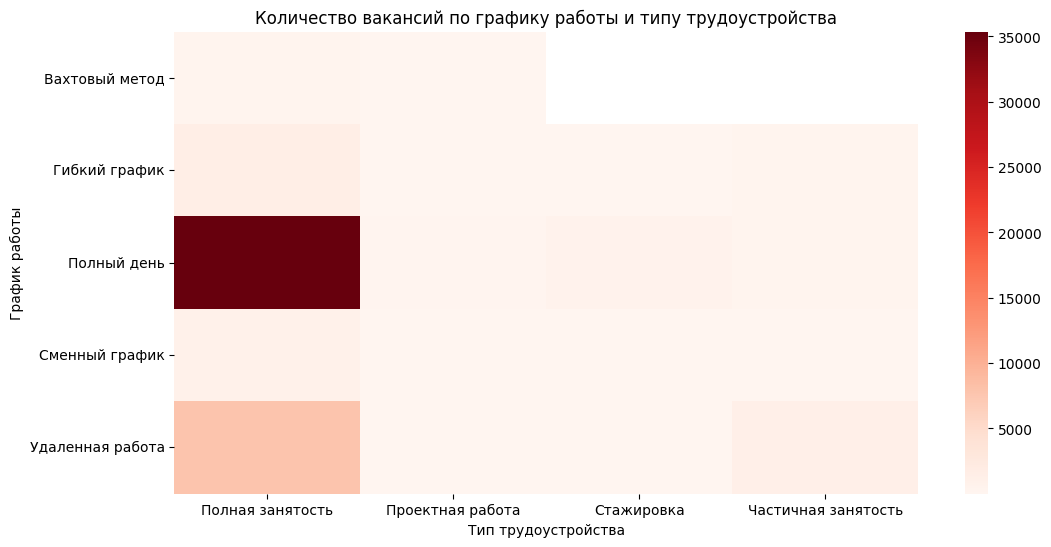

In [99]:
pivot = df_4_4.pivot_table(
    values='Количество вакансий',
    columns='Тип трудоустройства',
    index='График работы',
)
plt.figure(figsize=(12,6))
heatmap = sns.heatmap(data=pivot, cmap='Reds')
heatmap.set_title('Количество вакансий по графику работы и типу трудоустройства');

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [90]:
# текст запроса
query_4_5 = f'''
            SELECT 
                experience AS "Требуемый опыт работы",
                COUNT(id) AS "Количесво вакансий"               
            FROM public.vacancies
            GROUP BY 1
            ORDER BY 2 ASC
'''

In [91]:
# результат запроса
df_4_5=pd.read_sql_query(query_4_5,connection)
display(df_4_5)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/326401641.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_4_5=pd.read_sql_query(query_4_5,connection)


,Требуемый опыт работы,Количесво вакансий
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

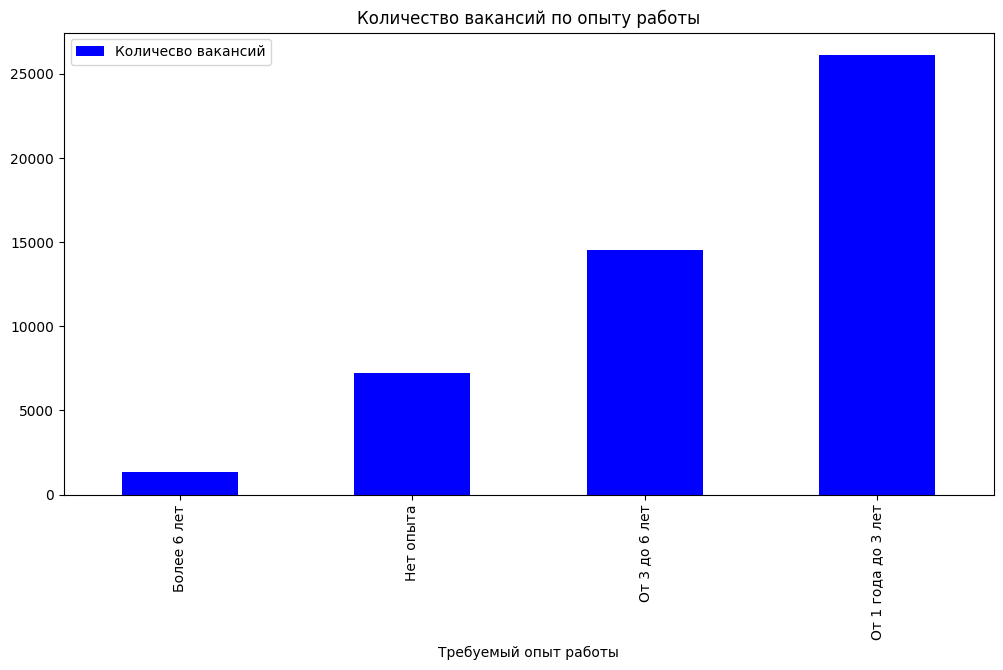

In [100]:
df_4_5.plot(
    x='Требуемый опыт работы',
    figsize=(12,6),
    kind='bar',
    title='Количество вакансий по опыту работы',
    color='blue'
    );

In [ ]:
# выводы по детальному анализу вакансий

### Выводы по детальному анализу вакансий

ТОП 5 регионов по количествам вакансий: Москва, Санкт_Петербург, Минск, Новосибирск, Алматы.

      * Количество вакансий в Москве - 5333шт., за ней с отставанием примерно в 2 раза идут остальные регионы.
      * В выборке предствалены 3 страны: Россия, Белорусия, Казахстан.
      * Все регионы или столицы, или города-миллионники.

В 49% (24 073 вакансии) работодатели указали уровень заработной платы.:

      * Среднее значение по нижней границе зарплаты 71065.0 рублей;
      * Среднее значение по верхней границе зарплаты	110537.0 рублей.

В основном работодатели размещают вакансии с полной занятостью, более 92%.

      * Больше всего вакансий с типом занятости полный рабочий день - 72%.
      * Набирает популярность удаленная работа - 16%.
      * На третьем месте по количеству вакансий гибкий график - 3%.
      
ТОП 3 вакансий по требуемому опыту работы, более 97%:

      1. от 1 года до 3 лет - 26152 шт;
      2. От 3 до 6 лет	- 14511 шт;
      3. Нет опыта	 - 7197 шт.


# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [115]:
# текст запроса
query_5_1 = f'''
            (SELECT 
                 e.name AS "Название работодателя",
                 COUNT(v.id) AS "Количесво вакансий"               
            FROM public.vacancies AS v
                 JOIN public.employers AS e ON v.employer_id=e.id
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 1)
            UNION
            (SELECT 
                 e.name AS "Название работодателя",
                 COUNT(v.id) AS "Количество вакансий"               
            FROM public.vacancies AS v
                 JOIN public.employers AS e ON v.employer_id=e.id
            GROUP BY 1
            ORDER BY 2 DESC
            OFFSET 4 LIMIT 1)
            ORDER BY 2 DESC
'''

In [116]:
# результат запроса
df_5_1=pd.read_sql_query(query_5_1,connection)
display(df_5_1)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/3813885883.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_1=pd.read_sql_query(query_5_1,connection)


,Название работодателя,Количесво вакансий
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [119]:
# текст запроса
query_5_2 = f'''
            SELECT 
                 a.name AS "Регион",
                 count(e.id) AS "Количество работодателей",
                 count(v.id) AS "Количество вакансий"
            FROM public.areas a
            LEFT JOIN employers AS e ON a.id=e.area
            LEFT JOIN vacancies AS v ON a.id=v.area_id
            WHERE v.id IS NULL
            GROUP BY 1
            ORDER BY 2 DESC
            LIMIT 1
            '''

In [120]:
# результат запроса
df_5_2=pd.read_sql_query(query_5_2,connection)
display(df_5_2)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/3239200597.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_2=pd.read_sql_query(query_5_2,connection)


,Регион,Количество работодателей,Количество вакансий
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [123]:
# текст запроса
query_5_3 = f'''
            SELECT 
                 e.name AS "Работодатель",
                 COUNT(DISTINCT v.area_id) AS "Количество регионов публикации"
            FROM public.vacancies AS v
            LEFT JOIN employers AS e ON e.id=v.employer_id
            GROUP BY 1
            ORDER BY 2 DESC
            '''

In [124]:
# результат запроса
df_5_3=pd.read_sql_query(query_5_3,connection)
display(df_5_3)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/3553942437.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_3=pd.read_sql_query(query_5_3,connection)


,Работодатель,Количество регионов публикации
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [127]:
# текст запроса
query_5_4 = f'''
            SELECT 
                 COUNT(*) AS "Не указана сфера деятельности"
            FROM public.employers AS e
            LEFT JOIN employers_industries AS ei ON e.id=ei.employer_id
            WHERE ei.industry_id IS NULL
            '''

In [128]:
# результат запроса
df_5_4=pd.read_sql_query(query_5_4,connection)
display(df_5_4)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/2894264343.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_4=pd.read_sql_query(query_5_4,connection)


,Не указана сфера деятельности
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [135]:
# текст запроса
query_5_5 = f'''
            SELECT
                 e.name AS "Название компании", 
                 COUNT(ei.industry_id) AS "Колическтво сфер деятельности"
            FROM public.employers AS e
            LEFT JOIN employers_industries AS ei ON e.id=ei.employer_id
            GROUP BY 1
            HAVING COUNT(ei.industry_id)=4
            ORDER BY 1
            OFFSET 2 LIMIT 1
            '''

In [136]:
# результат запроса
df_5_5=pd.read_sql_query(query_5_5,connection)
display(df_5_5)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/971808023.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_5=pd.read_sql_query(query_5_5,connection)


,Название компании,Колическтво сфер деятельности
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [141]:
# текст запроса
query_5_6 = f'''
            SELECT 
               FORMAT('У %s работодателей не указана сфера деятельности', COUNT(ei.employer_id))
            FROM public.industries AS i
            LEFT JOIN employers_industries AS ei ON i.id=ei.industry_id
            WHERE i.name='Разработка программного обеспечения'
            '''

In [142]:
# результат запроса
df_5_6=pd.read_sql_query(query_5_6,connection)
display(df_5_6)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_44951/1859661366.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_6=pd.read_sql_query(query_5_6,connection)


,format
0,У 3553 работодателей не указана сфера деятельн...


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [6]:
# код для получения списка городов-милионников.
# Не смог заставить работать код, выходит ошибка: "<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)>"
# поэтому создал кортеж для проверки запроса.


#url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
#table1 = pd.read_html(url)
#mill_cities = pd.DataFrame(table1[1])
#mill_cities = tuple(mill_cities['Город'].replace('Воронеж[a]', 'Воронеж'))
mill_cities = ('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Челябинск',
 'Красноярск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Омск',
 'Краснодар',
 'Воронеж',
 'Пермь',
 'Волгоград') 

In [18]:
# текст запроса
query_5_7 = f'''
            SELECT 
                 a.name "Город",
                 count(v.id) "Количество вакансий"
            FROM public.employers e
            JOIN public.vacancies v ON e.id=v.employer_id
            JOIN public.areas a ON v.area_id=a.id
            WHERE e.name='Яндекс' AND a.name in {mill_cities}
            GROUP BY a.id
            UNION ALL
            SELECT 
                 'Total',
                 count(*)
            FROM public.vacancies v
            JOIN public.employers e ON e.id=v.employer_id
            JOIN public.areas a ON a.id=v.area_id
            WHERE e.name='Яндекс' AND a.name in {mill_cities}
            ORDER BY 2
            '''

In [19]:
# результат запроса
df_5_7=pd.read_sql_query(query_5_7,connection)
display(df_5_7)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/1297656552.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_5_7=pd.read_sql_query(query_5_7,connection)


,Город,Количество вакансий
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

In [ ]:
# выводы по анализу работодателей

### Выводы по анализу работодателей:

1. В топ-5 работодателей по количеству вакансий входят: "Яндекс" - 4% из всех вакансий, "Ростелеком" - 1%, "Тинькофф" - 0.9%, "Сбер" - 0.9%, "Газпром нефть" - 0.7%.

2. В регионе "Россия" самое большое количество работодателей при отсутствии размещённых в данном регионе вакансий. То есть работодатели привязывают вакансии к городам, а не странам.

3.  "Яндекс" размещает вакансии в самом большом количестве регионов (181 регион), "Ростелеком" - в 152 регионах, "Спецремонт" - в 116 регионах.

4. В 17% (8 419 вакансий) из всех вакансий работодатели не указывают сферу деятельности. Значит ее либо нет в перечневозможных для выбора, либо нужно добавить это поле как обязательное для заполения.

5. 5% (1 138 работодателей) из всех работодатеелй указывают в вакансиях четыре сферы деятельности.

6. 15% (3 553 работодателя) из всех работодатеелй указывают в сферах деятельности вакансии "Разработка программного обеспечения".

7. 25% (485 вакансий) из всех вакансий "Яндекс" представлены в российских городах-миллионниках.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [24]:
# текст запроса
query_6_1 = f'''
            SELECT
                COUNT(name) AS "Количество вакансий"
            FROM public.vacancies
            WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
            '''

In [25]:
# результат запроса
df_6_1=pd.read_sql_query(query_6_1,connection)
display(df_6_1)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/207663226.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_1=pd.read_sql_query(query_6_1,connection)


,Количество вакансий
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [53]:
# текст запроса
query_6_2 = f'''
            SELECT count(*) "Количество вакансий"
            FROM vacancies
            WHERE (name ilike '%data scientist%'
                  OR name ilike '%data science%'
                  OR name ilike '%исследователь данных%'
                  OR (name like '%ML%' AND name not ilike '%HTML%')
                  OR name ilike '%machine learning%'
                  OR name ilike '%машинн%обучен%')
                  AND (name ilike '%junior%'
                  OR experience='Нет опыта'
                  OR employment='Стажировка')
       '''

In [54]:
# результат запроса
df_6_2=pd.read_sql_query(query_6_2,connection)
display(df_6_2)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/106710462.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_2=pd.read_sql_query(query_6_2,connection)


,Количество вакансий
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [57]:
# текст запроса
query_6_3 = f'''
            SELECT count(*) "Количество вакансий"
            FROM vacancies
            WHERE (name ilike '%data scientist%'
                  OR name ilike '%data science%'
                  OR name ilike '%исследователь данных%'
                  OR (name like '%ML%' AND name not ilike '%HTML%')
                  OR name ilike '%machine learning%'
                  OR name ilike '%машинн%обучен%')
                  AND (key_skills like '%SQL%' 
                  OR key_skills ilike '%postgres%')
            '''

In [58]:
# результат запроса
df_6_3=pd.read_sql_query(query_6_3,connection)
display(df_6_3)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/2516701016.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_3=pd.read_sql_query(query_6_3,connection)


,Количество вакансий
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [60]:
# текст запроса
query_6_4 = f'''
            SELECT count(*) "Количество вакансий"
            FROM vacancies
            WHERE (name ilike '%data scientist%'
                  OR name ilike '%data science%'
                  OR name ilike '%исследователь данных%'
                  OR (name like '%ML%' AND name not ilike '%HTML%')
                  OR name ilike '%machine learning%'
                  OR name ilike '%машинн%обучен%')
                  AND (key_skills like '%Python%')
            '''

In [61]:
# результат запроса
df_6_4=pd.read_sql_query(query_6_4,connection)
display(df_6_4)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_48190/3979862189.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_4=pd.read_sql_query(query_6_4,connection)


,Количество вакансий
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [13]:
# текст запроса
query_6_5 = f'''
            SELECT 
                  ROUND(AVG(length(key_skills)-length(replace(key_skills, CHR(9), ''))+1), 2) "Среднее количество навыков"
            FROM vacancies
            WHERE (name ilike '%data scientist%'
                  OR name ilike '%data science%'
                  OR name ilike '%исследователь данных%'
                  OR (name like '%ML%' AND name not ilike '%HTML%')
                  OR name ilike '%machine learning%'
                  OR name ilike '%машинн%обучен%')
            
            '''

In [14]:
# результат запроса
df_6_5=pd.read_sql_query(query_6_5,connection)
display(df_6_5)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_49143/486980282.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_5=pd.read_sql_query(query_6_5,connection)


,Среднее количество навыков
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [18]:
# текст запроса
query_6_6 = f'''
            SELECT 
                  experience "Опыт работы",
                  ROUND(AVG(COALESCE((salary_from+salary_to)/2, salary_from, salary_to))) "Средняя ЗП"
            FROM vacancies
            WHERE (name ilike '%data scientist%'
                  OR name ilike '%data science%'
                  OR name ilike '%исследователь данных%'
                  OR (name like '%ML%' AND name not ilike '%HTML%')
                  OR name ilike '%machine learning%'
                  OR name ilike '%машинн%обучен%')
                  AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
            GROUP BY experience
            
            
            '''

In [19]:
# результат запроса
df_6_6=pd.read_sql_query(query_6_6,connection)
display(df_6_6)

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_49143/1305758348.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_6_6=pd.read_sql_query(query_6_6,connection)


,Опыт работы,Средняя ЗП
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

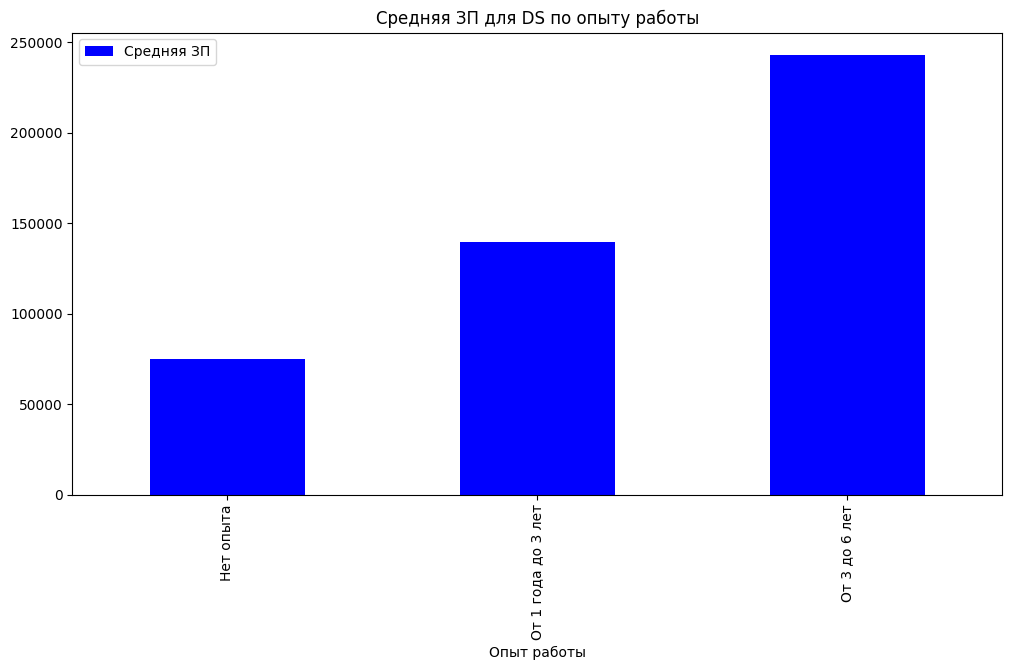

In [20]:
df_6_6.plot(
    x='Опыт работы',
    figsize=(12,6),
    kind='bar',
    title='Средняя ЗП для DS по опыту работы',
    color='blue'
    );

In [ ]:
# выводы по предметному анализу

### Выводы по предметному анализу:

1. 3.6% (1 771) из всех вакансий имеют отношение к работе с данными.
2. 2.9% (51) из вакансий, имеющих отношение к работе с данными, подходит для начинающих дата-саентистов.
3. В 11.3% (201) из вакансий, имеющих отношение к работе с данными, указан ключевой навык "SQL" или "postgres".
4. В 19.8% (351 вакансия) из вакансий, имеющих отношение к работе с данными, указан ключевой навык "Python".
5. В вакансиях для DS работодатели указывают в среднем 6 ключевых навыков.
6. В вакансиях для DS работодатели указывают в среднюю заработную плату: без опыта работы - 74 643 руб., с опытом работы от 1 года до 3 лет - 139 675 руб., с опытом работы от 3 до 6 лет - 243 115 руб..
     
     * С ростом опыта работы средняяя ЗП растет на 50% каждые 3 года стажа.

# Общий вывод по проекту

In [ ]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

## Предварительный анализ данных:

* Всего в исследуемой базе данных 49 197 вакансий, представленных в 294 сферах деятельности, от 23 501 работодателя в 1 362 регионах.

* География регионов - Россия и СНГ.

* Количество вакансий более чем в 2 раза болше количества работодателей. Некоторые работодатели разместили больше одной вакансии, то есть у них идет интенсивный набор в штат.

* 11% из всех вакансий представлены в Москве.

## Детальный анализ вакансий:

ТОП 5 регионов по количествам вакансий: Москва, Санкт_Петербург, Минск, Новосибирск, Алматы.

      * Количество вакансий в Москве - 5333шт., за ней с отставанием примерно в 2 раза идут остальные регионы.
      * В выборке предствалены 3 страны: Россия, Белорусия, Казахстан.
      * Все регионы или столицы, или города-миллионники.

В 49% (24 073 вакансии) работодатели указали уровень заработной платы.:

      * Среднее значение по нижней границе зарплаты 71065.0 рублей;
      * Среднее значение по верхней границе зарплаты	110537.0 рублей.

В основном работодатели размещают вакансии с полной занятостью, более 92%.

      * Больше всего вакансий с типом занятости полный рабочий день - 72%.
      * Набирает популярность удаленная работа - 16%.
      * На третьем месте по количеству вакансий гибкий график - 3%.
      
ТОП 3 вакансий по требуемому опыту работы, более 97%:

      1. от 1 года до 3 лет - 26152 шт;
      2. От 3 до 6 лет	- 14511 шт;
      3. Нет опыта	 - 7197 шт.

## Анализ работодателей:

* В топ-5 работодателей по количеству вакансий входят: "Яндекс" - 4% из всех вакансий, "Ростелеком" - 1%, "Тинькофф" - 0.9%, "Сбер" - 0.9%, "Газпром нефть" - 0.7%.

* "Яндекс" размещает вакансии в самом большом количестве регионов (181 регион), "Ростелеком" - в 152 регионах, "Спецремонт" - в 116 регионах.

* В 17% (8 419 вакансий) из всех вакансий работодатели не указывают сферу деятельности. Значит ее либо нет в перечневозможных для выбора, либо нужно добавить это поле как обязательное для заполения.

* 5% (1 138 работодателей) из всех работодатеелй указывают в вакансиях четыре сферы деятельности.

* 15% (3 553 работодателя) из всех работодатеелй указывают в сферах деятельности вакансии "Разработка программного обеспечения".

* 25% (485 вакансий) из всех вакансий "Яндекс" представлены в российских городах-миллионниках.

## Предметный анализ по специализации Data Science:

1. 1771 вакансия имеет отношение к работе с данными. Из них в 11.3% вакансий указан ключевой навык "SQL" или "postgres", а в 19.8% вакансий - "Python".
2. В исследуемой базе данных всего 9 вакансий для начинающих DS с типом занятости "Стажировка" и без опыта работы.
3. В вакансиях для DS работодатели указывают в среднем 6 ключевых навыков.
4. Средняя зарплата для Junior DS соответствует нижней границе средней зарплаты по всем сферам деятельности.
5. Самая большая средняя ЗП для начинающего DS в г.Санкт-Петербург и г.Новосибирск.
     
        * С ростом опыта работы средняяя ЗП растет на 50% каждые 3 года стажа.

       

# Дополнительные исследования

### Запрос на количество вакансий для Junior DS без опыта работы с возможностью стажировки.

In [23]:
query_dop_1 = f'''
SELECT a.name "Регион",
       round(avg(coalesce((v.salary_from+v.salary_to)/2, v.salary_from, v.salary_to, 0))) "Средняя ЗП",
       count(v.id) "Количество вакансий"
FROM vacancies v
JOIN areas a ON v.area_id=a.id
WHERE (v.name ilike '%data scientist%'
       OR v.name ilike '%data science%'
       OR v.name ilike '%исследователь данных%'
       OR (v.name like '%ML%'
           AND v.name not ilike '%HTML%')
       OR v.name ilike '%machine learning%'
       OR v.name ilike '%машинн%обучен%')
  AND (v.salary_from IS NOT NULL
       OR v.salary_to IS NOT NULL)
  AND (v.name ilike '%junior%'
       OR v.experience='Нет опыта'
       OR v.employment='Стажировка')
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
'''
df_dop_1 = pd.read_sql_query(query_dop_1, connection)
df_dop_1

/var/folders/8j/1fmktzgj0f1b55j3jyrxs_2m0000gn/T/ipykernel_49143/1660221526.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dop_1 = pd.read_sql_query(query_dop_1, connection)


,Регион,Средняя ЗП,Количество вакансий
0,Санкт-Петербург,87667.0,3
1,Новосибирск,80000.0,1
2,Москва,72500.0,1
3,Владивосток,70000.0,1
4,Пермь,60000.0,1
5,Ростов-на-Дону,50000.0,1
6,Екатеринбург,37000.0,1


* В исследуемой базе данных всего 9 вакансий для начинающих DS, с типом занятости "Стажировка" и без опыта работы.

* Санкт-Петербург находится на 1 месте по размеру средней ЗП и по количеству представленных вакансий.

* При этом в Санкт-Петербурге и Новосибирске размер средней ЗП больше, чем средняя ЗП (74 643 рублей) для начинающих DS ("Нет опыта"), а в остальных городах - меньше. 

In [24]:
connection.close()